In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df["Age"].isnull().sum()

np.int64(177)

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True) 

C:\Users\soham\AppData\Local\Temp\ipykernel_17972\2911196814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
df["Age"].isnull().sum()

np.int64(0)

In [9]:
df["Embarked"].isna().sum()

np.int64(2)

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0] , inplace = True)

C:\Users\soham\AppData\Local\Temp\ipykernel_17972\1850037797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0] , inplace = True)


In [11]:
df["Embarked"].isna().sum()

np.int64(0)

In [12]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) 

In [13]:
# One-hot encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [14]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,True
887,1,1,0,19.0,0,0,30.0000,False,True
888,0,3,0,28.0,1,2,23.4500,False,True
889,1,1,1,26.0,0,0,30.0000,False,False


In [16]:
df["Embarked_Q"] = df["Embarked_Q"].astype(int)
df["Embarked_S"] = df["Embarked_S"].astype(int)


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [18]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.25)

In [20]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

c:\Users\soham\anaconda3\envs\myproject\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
114,3,0,17.0,0,0,14.4583,0,0
285,3,1,33.0,0,0,8.6625,0,0
486,1,0,35.0,1,0,90.0000,0,1
115,3,1,21.0,0,0,7.9250,0,1
664,3,1,20.0,1,0,7.9250,0,1
...,...,...,...,...,...,...,...,...
326,3,1,61.0,0,0,6.2375,0,1
850,3,1,4.0,4,2,31.2750,0,1
276,3,0,45.0,0,0,7.7500,0,1
217,2,1,42.0,1,0,27.0000,0,1


In [22]:
y_test

114    0
285    0
486    1
115    0
664    1
      ..
326    0
850    0
276    0
217    0
241    1
Name: Survived, Length: 223, dtype: int64

In [23]:
pred = lr.predict(x_test)
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])

In [24]:
print("✅ Accuracy:", accuracy_score(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

✅ Accuracy: 0.7668161434977578

Confusion Matrix:
 [[119  31]
 [ 21  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       150
           1       0.63      0.71      0.67        73

    accuracy                           0.77       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.78      0.77      0.77       223



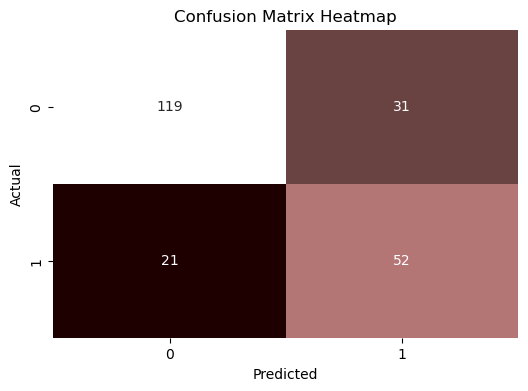

In [25]:
import seaborn as sns

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap="pink", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()



C:\Users\soham\AppData\Local\Temp\ipykernel_17972\2034570624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


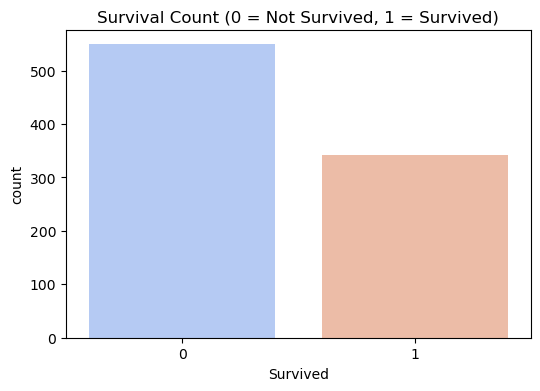

In [26]:
# 1️⃣ Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

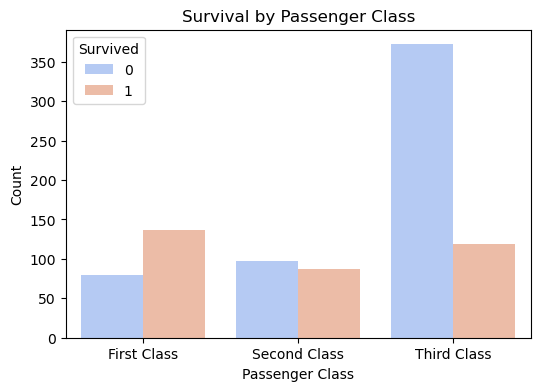

In [27]:
# Survival by Passenger Class with labels
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks([0,1,2], ["First Class", "Second Class", "Third Class"])
plt.show()


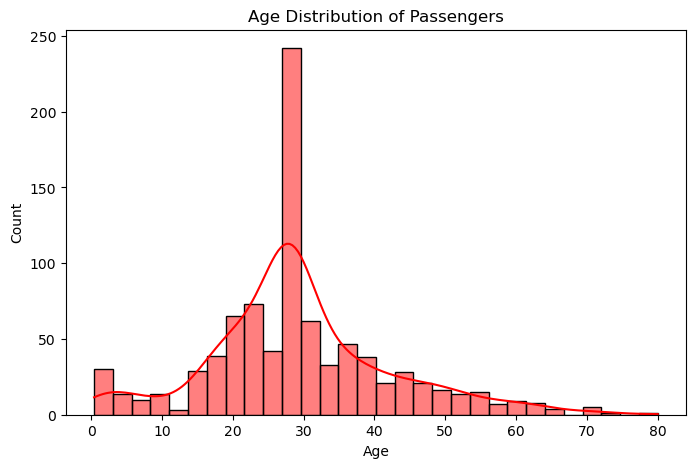

In [28]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, color="red")
plt.title("Age Distribution of Passengers")
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_17972\3675275913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")


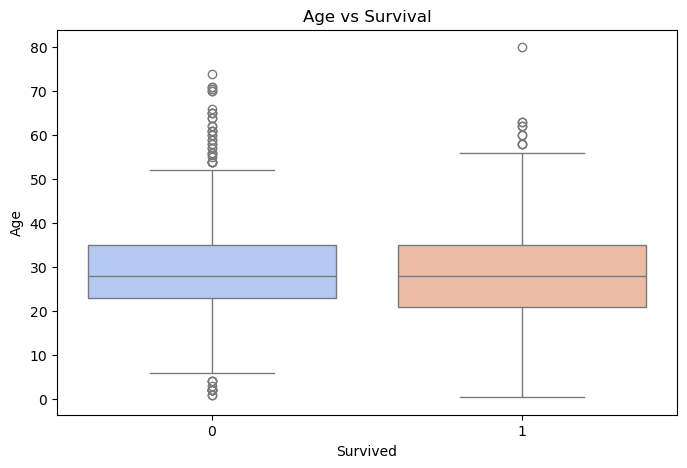

In [29]:
# Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
plt.title("Age vs Survival")
plt.show()


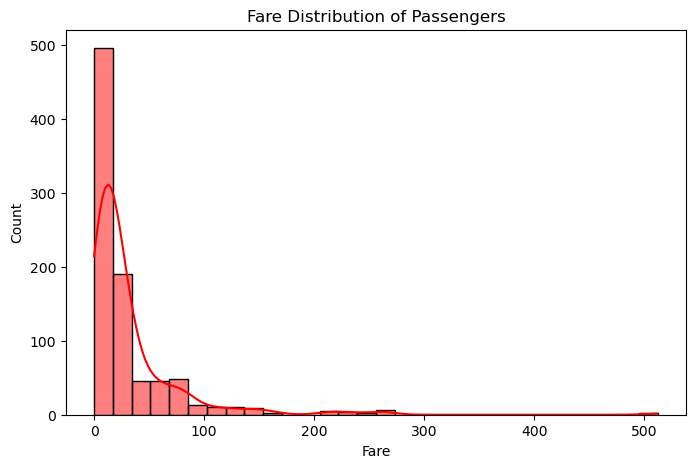

In [30]:
# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], bins=30, kde=True, color="red")
plt.title("Fare Distribution of Passengers")
plt.show()